## Email Spam Classification Project

### Objective:
This project aims to build a robust email spam classification system capable of identifying and filtering spam emails from legitimate ones. We will use a publicly available email dataset that includes key information such as the sender, receiver, email subject, body text, and spam labels. The goal is to analyze the dataset, apply appropriate machine learning techniques, and develop a model that accurately predicts whether an email is spam or not.

### Features:
- **Sender & Receiver Information**: Identify patterns in sender and receiver data.
- **Email Subject**: Extract insights from the subject line for classification.
- **Email Body**: Analyze the content of the email to detect potential spam.
- **Spam Label**: Use this label as a target for training the classification model.

The project will explore various machine learning algorithms, preprocessing techniques, and feature engineering methods to ensure high accuracy in spam detection.

### Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### Reading Dataset

In [3]:
df = pd.read_csv(r"Dataset/Original Dataset/email_dataset.csv")

### Printing Dataset

In [4]:
print("Email Dataset is:\n")

print(df.head())

Email Dataset is:

         Message ID                                   From  \
0  17d4d46e0a0a4383             contestinvite@codechef.com   
1  17d4d11679830d85          messages-noreply@linkedin.com   
2  17d4ca8aba50de36  messaging-digest-noreply@linkedin.com   
3  17d4c8f5b6467c68                   no-reply@spotify.com   
4  17d4c882ac4bb740         jobalerts-noreply@linkedin.com   

                            From (name)                   To  \
0                     Meg from CodeChef  utaku0611@gmail.com   
1                              LinkedIn  utaku0611@gmail.com   
2  ARUMULLA YASWANTH REDDY via LinkedIn  utaku0611@gmail.com   
3                               Spotify  utaku0611@gmail.com   
4                   LinkedIn Job Alerts  utaku0611@gmail.com   

             To (Name)                                            Subject  \
0  utaku0611@gmail.com  Coders, you're invited to C.O.D.E.R.S (Div 2 &...   
1     Priyanjali Gupta                        341 people are noticing

### Information about the Dataset

In [5]:
print("Information about the Dataset:\n")

print(df.info())

Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Message ID     293 non-null    object
 1   From           293 non-null    object
 2   From (name)    293 non-null    object
 3   To             293 non-null    object
 4   To (Name)      281 non-null    object
 5   Subject        292 non-null    object
 6   Date Sent      293 non-null    object
 7   Date Received  293 non-null    object
 8   Email Text     293 non-null    object
 9   spam           293 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 23.0+ KB
None


### Columns of the Dataset

In [6]:
print("Columns of the Dataset:\n")

print(df.columns)

Columns of the Dataset:

Index(['Message ID', 'From', 'From (name)', 'To', 'To (Name)', 'Subject',
       'Date Sent', 'Date Received', 'Email Text', 'spam'],
      dtype='object')


### Deleting Unncessary Columns

In [7]:
df = df.drop(columns = ['Message ID', 'To', 'To (Name)', 'Date Sent', 'Date Received'], axis = 1)

### Columns of the Dataset after Deleting

In [8]:
print("Columns of the Dataset after Deleting:\n")

print(df.columns)

Columns of the Dataset after Deleting:

Index(['From', 'From (name)', 'Subject', 'Email Text', 'spam'], dtype='object')


### Printing Dataset

In [9]:
print("Email Dataset after Deleting Columns is:\n")

print(df.head())

Email Dataset after Deleting Columns is:

                                    From  \
0             contestinvite@codechef.com   
1          messages-noreply@linkedin.com   
2  messaging-digest-noreply@linkedin.com   
3                   no-reply@spotify.com   
4         jobalerts-noreply@linkedin.com   

                            From (name)  \
0                     Meg from CodeChef   
1                              LinkedIn   
2  ARUMULLA YASWANTH REDDY via LinkedIn   
3                               Spotify   
4                   LinkedIn Job Alerts   

                                             Subject  \
0  Coders, you're invited to C.O.D.E.R.S (Div 2 &...   
1                        341 people are noticing you   
2                ARUMULLA YASWANTH just messaged you   
3                           Breathe in, breathe out.   
4               30+ new jobs for 'android developer'   

                                          Email Text  spam  
0  \nHola CodeCheffers,\n\nTomorrow 

### Creating New Columns

In [10]:
# 1. Create 'no_reply' column
df['no_reply'] = df['From'].apply(lambda x: 1 if 'no-reply' in x else 0)

# 2. Create 'company' column (extract part after @ and before .com)
df['company'] = df['From'].apply(lambda x: re.search(r'@([^.]+)', x).group(1) if '@' in x else '')

# 3. Create 'reason' column (extract part before @)
df['reason'] = df['From'].apply(lambda x: x.split('@')[0] if '@' in x else '')

# 4. Clean 'Subject' column (remove special characters and unnecessary spaces)
df['Subject'] = df['Subject'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', str(x)).strip() if pd.notnull(x) else '')

print("Dataset after creating new columns are:\n")
print(df.head())

Dataset after creating new columns are:

                                    From  \
0             contestinvite@codechef.com   
1          messages-noreply@linkedin.com   
2  messaging-digest-noreply@linkedin.com   
3                   no-reply@spotify.com   
4         jobalerts-noreply@linkedin.com   

                            From (name)  \
0                     Meg from CodeChef   
1                              LinkedIn   
2  ARUMULLA YASWANTH REDDY via LinkedIn   
3                               Spotify   
4                   LinkedIn Job Alerts   

                                             Subject  \
0  Coders youre invited to CODERS Div 2  3 Rated ...   
1                        341 people are noticing you   
2                ARUMULLA YASWANTH just messaged you   
3                             Breathe in breathe out   
4                  30 new jobs for android developer   

                                          Email Text  spam  no_reply  \
0  \nHola CodeCheffers,\n\

### Company Column Unique Values

In [11]:
print("Companies Unique Values are:\n")

print(df['company'].unique())

Companies Unique Values are:

['codechef' 'linkedin' 'spotify' 'e' 'techgig' 'myntra' 'cloudhq'
 'webtoon' 'quora' 'mail' 'twitter' 'ncb' 'lifehack' 'hm' 'ncp' 'olacabs'
 'lenovo' 'email' 'itr' 'notify' 'delivery-status' 'sgp' 'amazon'
 'udacity' 'primevideo' 'icons8' 'gmail' 'accounts']


### Replacing Email and Gmail

In [12]:
# Replace 'email' and 'gmail' with 'personal' in the 'company' column
df['company'] = df['company'].replace({'email': 'personal', 'gmail': 'personal'})

# Check the unique values in the 'company' column to confirm the change
print("Companies Unique Values after Changing are:\n")
print(df['company'].unique())

Companies Unique Values after Changing are:

['codechef' 'linkedin' 'spotify' 'e' 'techgig' 'myntra' 'cloudhq'
 'webtoon' 'quora' 'mail' 'twitter' 'ncb' 'lifehack' 'hm' 'ncp' 'olacabs'
 'lenovo' 'personal' 'itr' 'notify' 'delivery-status' 'sgp' 'amazon'
 'udacity' 'primevideo' 'icons8' 'accounts']


### Cleaning Email Text

In [13]:
# 5. Clean 'Email Text' column (remove special characters, newlines, and unnecessary spaces)
df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]+', '', str(x)).replace('\n', ' ').strip() if pd.notnull(x) else '')

print("Dataset after Cleaning Emails is:\n")
print(df.head())

Dataset after Cleaning Emails is:

                                    From  \
0             contestinvite@codechef.com   
1          messages-noreply@linkedin.com   
2  messaging-digest-noreply@linkedin.com   
3                   no-reply@spotify.com   
4         jobalerts-noreply@linkedin.com   

                            From (name)  \
0                     Meg from CodeChef   
1                              LinkedIn   
2  ARUMULLA YASWANTH REDDY via LinkedIn   
3                               Spotify   
4                   LinkedIn Job Alerts   

                                             Subject  \
0  Coders youre invited to CODERS Div 2  3 Rated ...   
1                        341 people are noticing you   
2                ARUMULLA YASWANTH just messaged you   
3                             Breathe in breathe out   
4                  30 new jobs for android developer   

                                          Email Text  spam  no_reply  \
0  Hola CodeCheffers  Tomorrow w

### Adding Email Length Column

In [14]:
# Adding a new column 'Email Length' by counting the number of characters in each email
df['Email Length'] = df['Email Text'].apply(len)

# Display the first few rows to verify the new column
print("Dataset after adding Email Length Column is:\n")
print(df.head())

Dataset after adding Email Length Column is:

                                    From  \
0             contestinvite@codechef.com   
1          messages-noreply@linkedin.com   
2  messaging-digest-noreply@linkedin.com   
3                   no-reply@spotify.com   
4         jobalerts-noreply@linkedin.com   

                            From (name)  \
0                     Meg from CodeChef   
1                              LinkedIn   
2  ARUMULLA YASWANTH REDDY via LinkedIn   
3                               Spotify   
4                   LinkedIn Job Alerts   

                                             Subject  \
0  Coders youre invited to CODERS Div 2  3 Rated ...   
1                        341 people are noticing you   
2                ARUMULLA YASWANTH just messaged you   
3                             Breathe in breathe out   
4                  30 new jobs for android developer   

                                          Email Text  spam  no_reply  \
0  Hola CodeCheffers 

### Columns of Dataset

In [15]:
print("Columns of the Dataset after Adding new columns:\n")

print(df.columns)

Columns of the Dataset after Adding new columns:

Index(['From', 'From (name)', 'Subject', 'Email Text', 'spam', 'no_reply',
       'company', 'reason', 'Email Length'],
      dtype='object')


In [16]:
print("Information of the Dataset after Adding new columns:\n")

print(df.info())

Information of the Dataset after Adding new columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From          293 non-null    object
 1   From (name)   293 non-null    object
 2   Subject       293 non-null    object
 3   Email Text    293 non-null    object
 4   spam          293 non-null    int64 
 5   no_reply      293 non-null    int64 
 6   company       293 non-null    object
 7   reason        293 non-null    object
 8   Email Length  293 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 20.7+ KB
None


### Saving the Preprocessed Dataset

In [17]:
# df.to_csv(r"Dataset/Preprocessed Dataset/Preprocessed_Email_Dataset.csv")

#### Since the preprocessing is complete now we will move to EDA

## Exploratory Data Analysis

### Exploratory Data Analysis (EDA) involves analyzing the email dataset to uncover patterns, trends, and relationships, providing insights that guide feature selection and model development for spam classification.

### 1. Bar Plot of Spam vs. Non-Spam Emails

**Description:** Show the count of spam and non-spam emails to visualize the distribution.

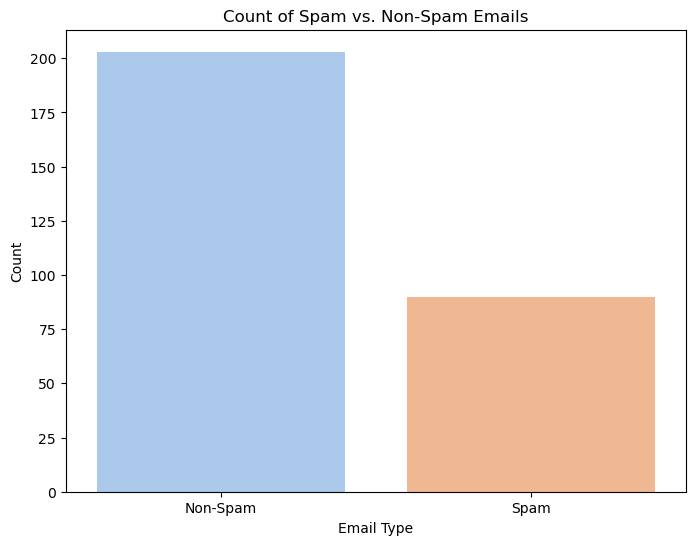

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df, palette='pastel')
plt.title('Count of Spam vs. Non-Spam Emails')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])
plt.ylabel('Count')
plt.xlabel('Email Type')

plt.savefig("Plots\Dataset\Count_of_Spam_vs._Non-Spam_Emails.png")

plt.show()


### 2. Distribution of Companies

**Description:** Create a bar plot of the number of emails received from each company (based on the company column).

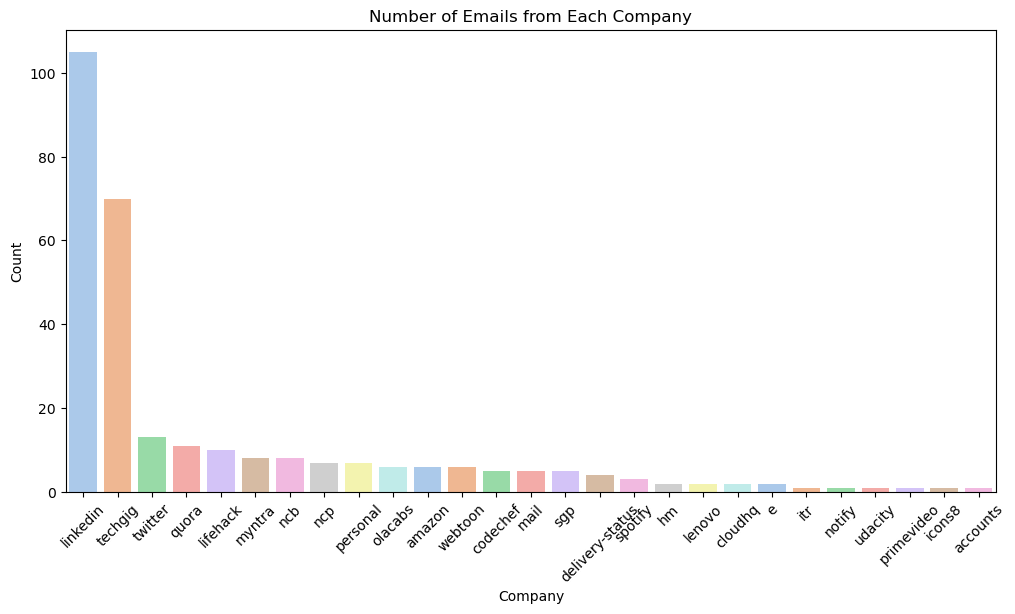

In [40]:
plt.figure(figsize=(12, 6))
company_counts = df['company'].value_counts()
sns.barplot(x=company_counts.index, y=company_counts.values, palette='pastel')
plt.title('Number of Emails from Each Company')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Company')
plt.savefig(r"Plots\Dataset\Number_of_Emails_from_Each_Company.png")
plt.show()

### 3. Word Cloud for Email Text

**Description:** Generate a word cloud to visualize the most common words in the email text.

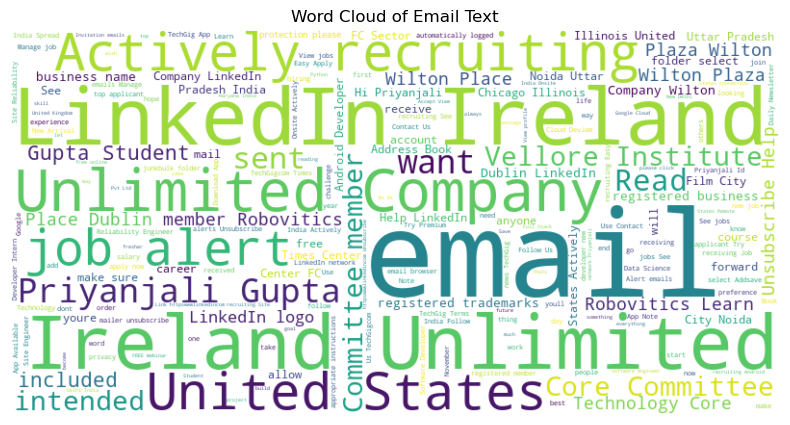

In [25]:
from wordcloud import WordCloud

text = ' '.join(df['Email Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Email Text')
plt.savefig("Plots\Dataset\Word_Cloud_of_Email_Text.png")
plt.show()


### 4. Heatmap of Spam Emails by Company

**Description:** Create a heatmap to show the relationship between companies and whether their emails are spam or not.

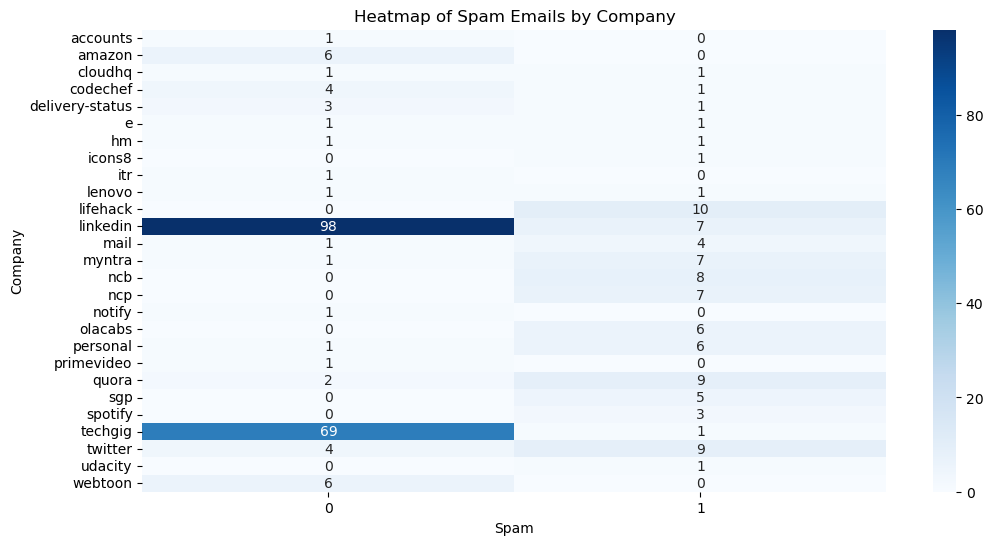

In [26]:
spam_company = df.pivot_table(index='company', columns='spam', values='From', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(spam_company, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Spam Emails by Company')
plt.xlabel('Spam')
plt.ylabel('Company')
plt.savefig("Plots\Dataset\Heatmap_of_Spam_Emails_by_Company.png")
plt.show()

### 5. Pie Chart for Email Type Distribution
**Description:** Use a pie chart to represent the proportion of spam and non-spam emails.

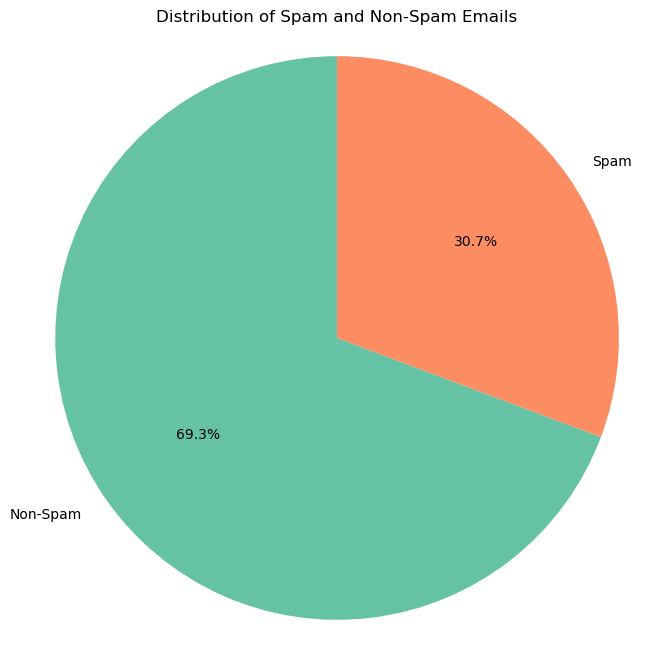

In [27]:
plt.figure(figsize=(8, 8))
spam_counts = df['spam'].value_counts()
plt.pie(spam_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.savefig("Plots\Dataset\Distribution_of_Spam_and_Non-Spam_Emails.png")
plt.show()


### 6. (A) Count of Emails by Sender

**Description:** A horizontal bar plot to show the top senders with the most emails.

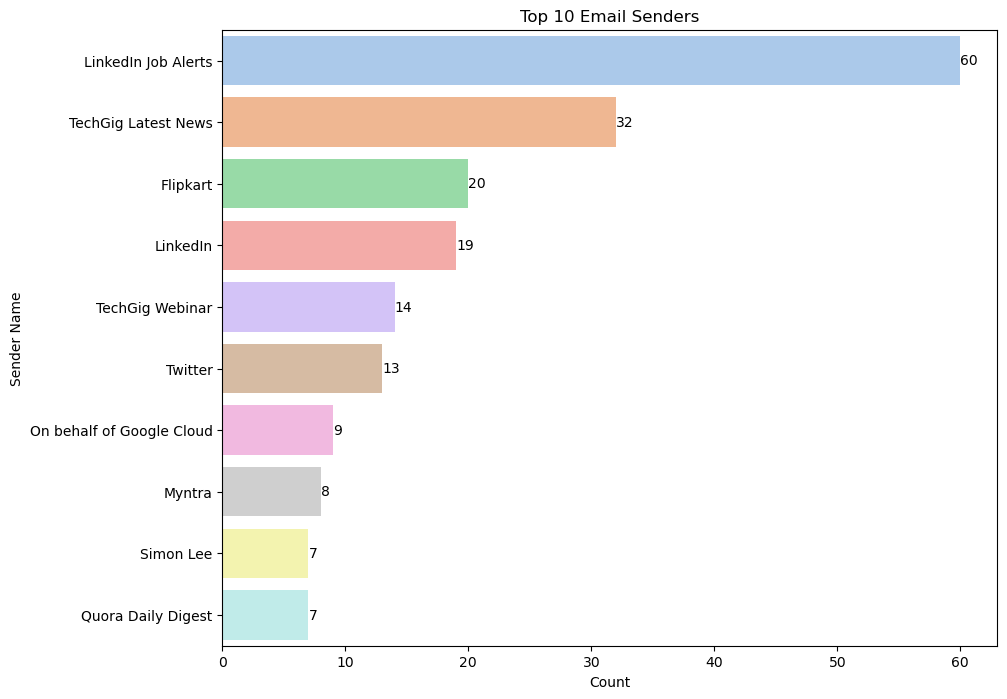

In [28]:
plt.figure(figsize=(10, 8))

# Get the top 10 email senders
top_senders = df['From (name)'].value_counts().head(10)

# Plot the data
ax = sns.barplot(y=top_senders.index, x=top_senders.values, palette='pastel')

# Add annotations to display the counts on each bar
for i, value in enumerate(top_senders.values):
    ax.text(value, i, f'{value}', va='center')

plt.title('Top 10 Email Senders')
plt.xlabel('Count')
plt.ylabel('Sender Name')
plt.savefig("Plots\Dataset\Top_10_Email_Senders.png")
plt.show()


### 6. (B) Count of Spam Emails by Sender

**Description:** A horizontal bar plot to show the top senders with the most spam emails.

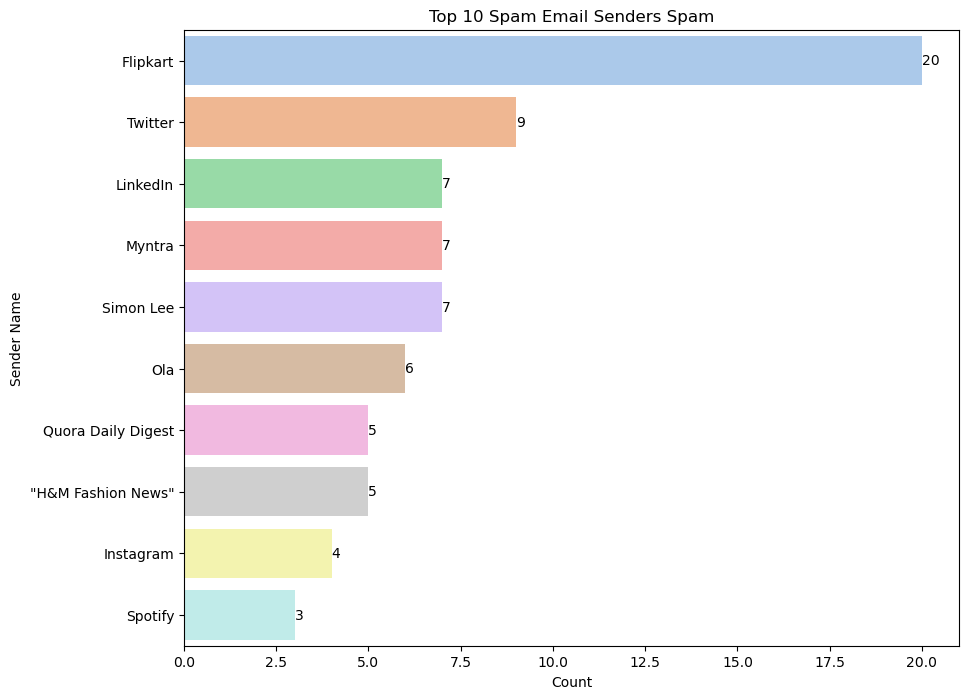

In [29]:
plt.figure(figsize=(10, 8))

# Filter for spam emails and get the top 10 spam senders
top_spam_senders = df[df['spam'] == 1]['From (name)'].value_counts().head(10)

# Plot the data
ax = sns.barplot(y=top_spam_senders.index, x=top_spam_senders.values, palette='pastel')

# Add annotations to display the counts on each bar
for i, value in enumerate(top_spam_senders.values):
    ax.text(value, i, f'{value}', va='center')

plt.title('Top 10 Spam Email Senders Spam')
plt.xlabel('Count')
plt.ylabel('Sender Name')
plt.savefig("Plots\Dataset\Top_10_Email_Senders_Spam.png")
plt.show()


### 6. (C) Count of Non-Spam Emails by Sender

**Description:** A horizontal bar plot to show the top senders with the most non-spam emails.

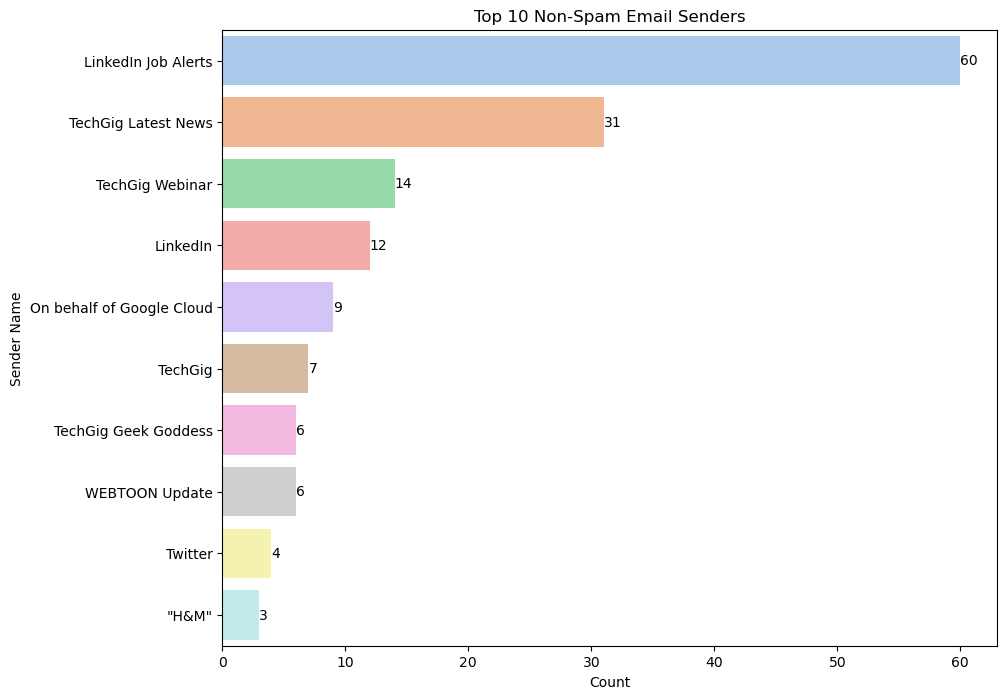

In [30]:
plt.figure(figsize=(10, 8))

# Filter for non-spam emails and get the top 10 non-spam senders
top_spam_senders = df[df['spam'] == 0]['From (name)'].value_counts().head(10)

# Plot the data
ax = sns.barplot(y=top_spam_senders.index, x=top_spam_senders.values, palette='pastel')

# Add annotations to display the counts on each bar
for i, value in enumerate(top_spam_senders.values):
    ax.text(value, i, f'{value}', va='center')

plt.title('Top 10 Non-Spam Email Senders')
plt.xlabel('Count')
plt.ylabel('Sender Name')
plt.savefig("Plots\Dataset\Top_10_Non-Spam_Email_Senders.png")
plt.show()


### 7. Box Plot of Email Lengths by Spam Status

**Description:** Show the distribution of email lengths for spam and non-spam emails to see if there is a significant difference.

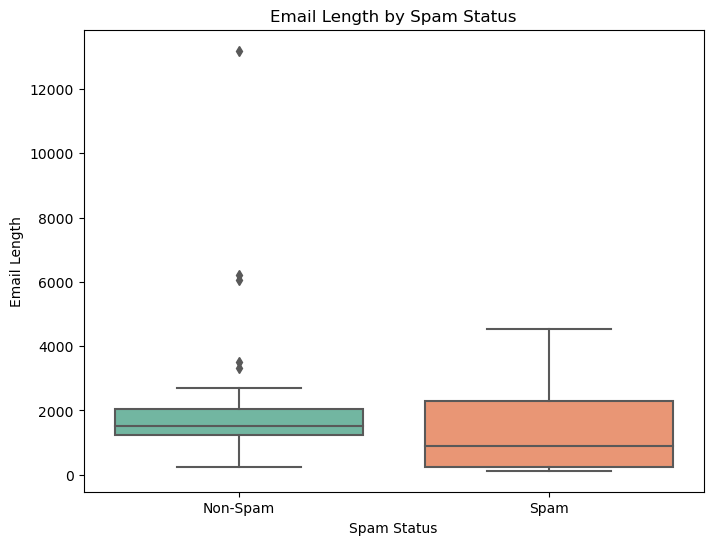

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='spam', y='Email Length', data=df, palette='Set2')
plt.title('Email Length by Spam Status')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])
plt.ylabel('Email Length')
plt.xlabel('Spam Status')
plt.savefig("Plots\Dataset\Email_Length_by_Spam_Status.png")
plt.show()

### 8. Scatter Plot of Email Length vs. Spam Status

**Description:** Show a scatter plot that depicts the relationship between email text length and whether the email is spam. This will help visualize if longer emails are more likely to be spam.

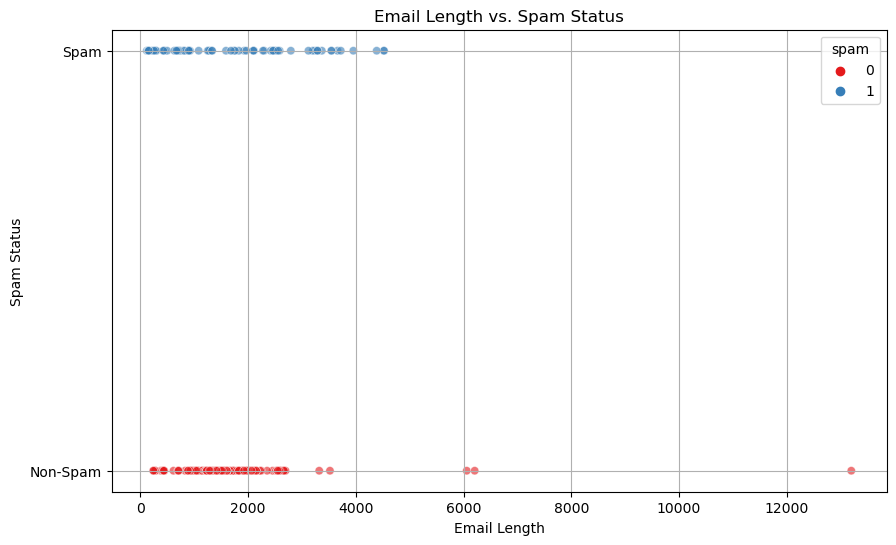

In [32]:
df['Email Length'] = df['Email Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Email Length', y='spam', data=df, alpha=0.6, hue='spam', palette='Set1')
plt.title('Email Length vs. Spam Status')
plt.xlabel('Email Length')
plt.ylabel('Spam Status')
plt.yticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])
plt.grid()
plt.show()

### 9. Histogram of Email Lengths

**Description:** A histogram to visualize the distribution of email lengths and how they relate to spam status.

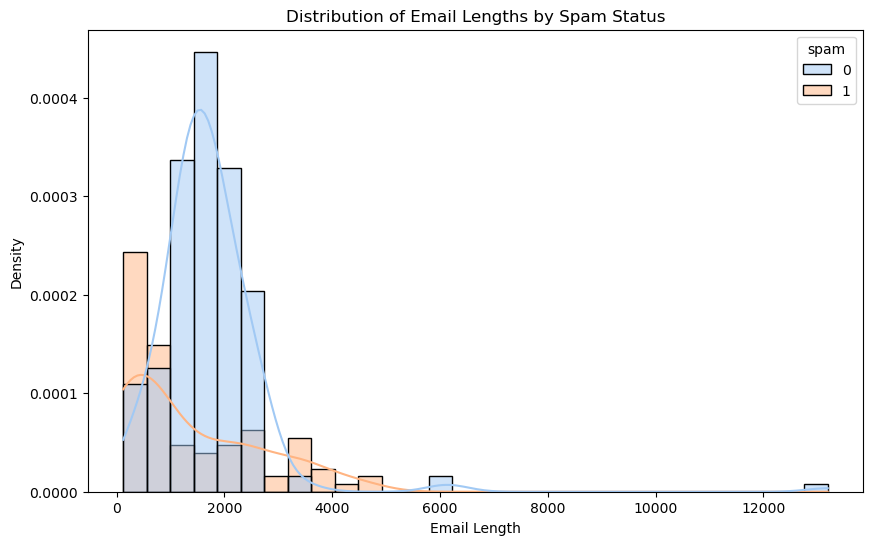

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Email Length', hue='spam', bins=30, kde=True, palette='pastel', stat='density')
plt.title('Distribution of Email Lengths by Spam Status')
plt.xlabel('Email Length')
plt.ylabel('Density')
plt.savefig("Plots\Dataset\Distribution_of_Email_Lengths_by_Spam_Status.png")
plt.show()

### 10. Count of No-Reply Emails vs. Spam Status
**Description:** Bar plot to visualize how many no-reply emails are spam versus non-spam.

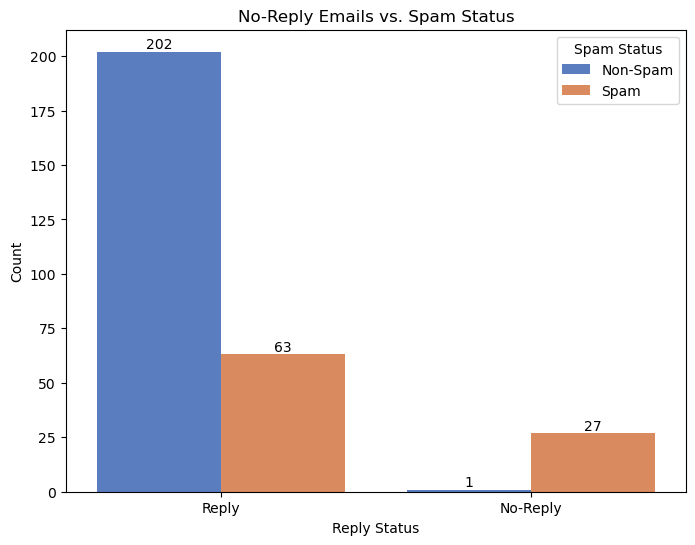

In [39]:
plt.figure(figsize=(8, 6))

# Create the plot and get the Axes object
ax = sns.countplot(x='no_reply', hue='spam', data=df, palette='muted')

# Add annotations for counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a positive height
        ax.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', 
                ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('No-Reply Emails vs. Spam Status')
plt.xticks(ticks=[0, 1], labels=['Reply', 'No-Reply'])
plt.ylabel('Count')
plt.xlabel('Reply Status')
plt.legend(title='Spam Status', loc='upper right', labels=['Non-Spam', 'Spam'])

# Save the plot
plt.savefig(r"Plots\Dataset\No-Reply_Emails_vs._Spam_Status.png")  # Raw string
plt.show()

### 11. Stacked Bar Chart of Spam Emails by Company
**Description:** A stacked bar chart to see the proportion of spam and non-spam emails from each company.

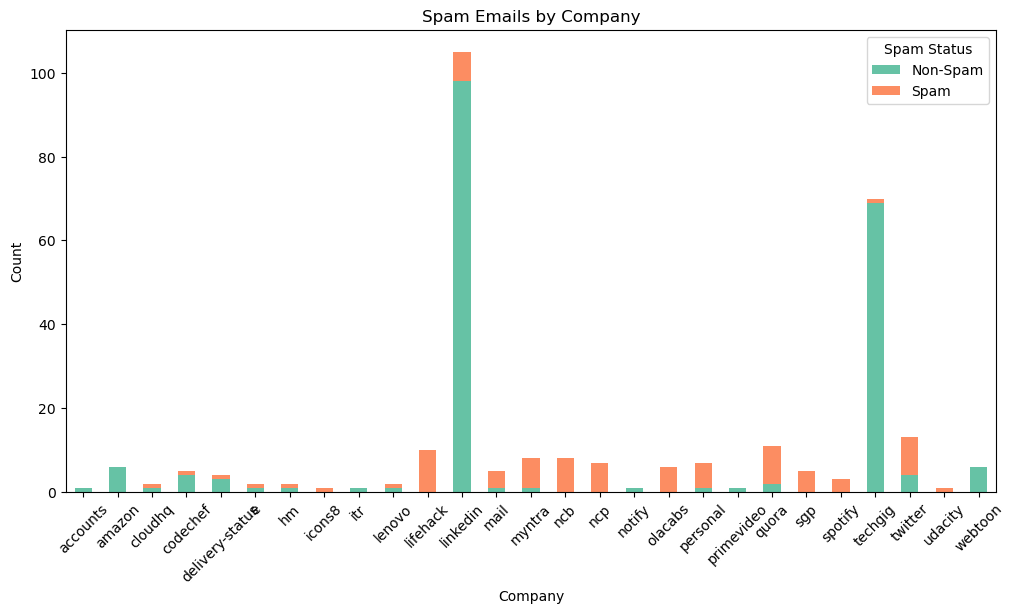

In [38]:
spam_company = df.groupby(['company', 'spam']).size().unstack(fill_value=0)
spam_company.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Spam Emails by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Spam Status', labels=['Non-Spam', 'Spam'])
plt.savefig("Plots\Dataset\Spam_Emails_by_Company.png")
plt.show()

### 12. Box Plot of Email Text Length by Company

**Description:** A box plot to show the distribution of email lengths for different companies, which can provide insights into which companies tend to send longer or shorter emails.

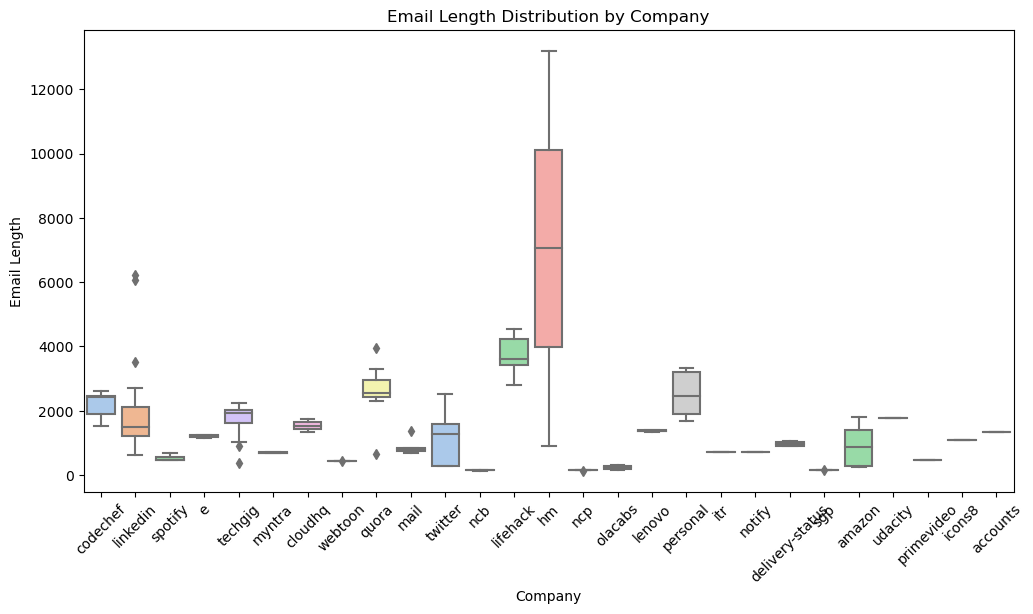

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='Email Length', data=df, palette='pastel')
plt.title('Email Length Distribution by Company')
plt.xticks(rotation=45)
plt.ylabel('Email Length')
plt.xlabel('Company')
plt.savefig("Plots\Dataset\Email_Length_Distribution_by_Company.png")
plt.show()

### 13. Violin Plot of Email Length by Spam Status

**Description:** A violin plot to show the distribution of email lengths for spam and non-spam emails, highlighting the density of the data.

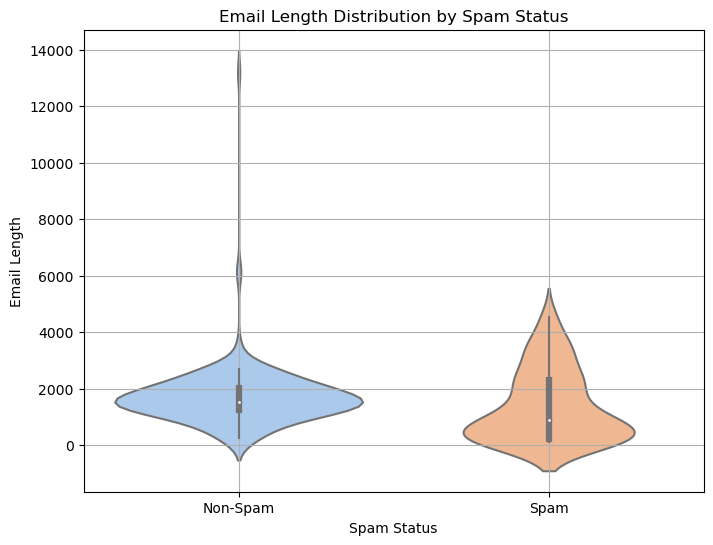

In [36]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='spam', y='Email Length', data=df, palette='pastel')
plt.title('Email Length Distribution by Spam Status')
plt.xticks(ticks=[0, 1], labels=['Non-Spam', 'Spam'])
plt.ylabel('Email Length')
plt.xlabel('Spam Status')
plt.grid()
plt.savefig("Plots\Dataset\Email_Length_Distribution_by_Spam_Status.png")
plt.show()

### 14. Pair Plot for Features

**Description:** Create a pair plot to visualize relationships between numerical features such as email length and spam status, along with other relevant columns if available.

In [ ]:
sns.pairplot(df, hue='spam', vars=['Email Length', 'no_reply'], palette='pastel')
plt.title('Pair Plot of Features')
plt.show()

### 15. Count of Emails by Sender and Spam Status
**Description:** Bar plot showing how many emails each sender has sent, divided into spam and non-spam categories.

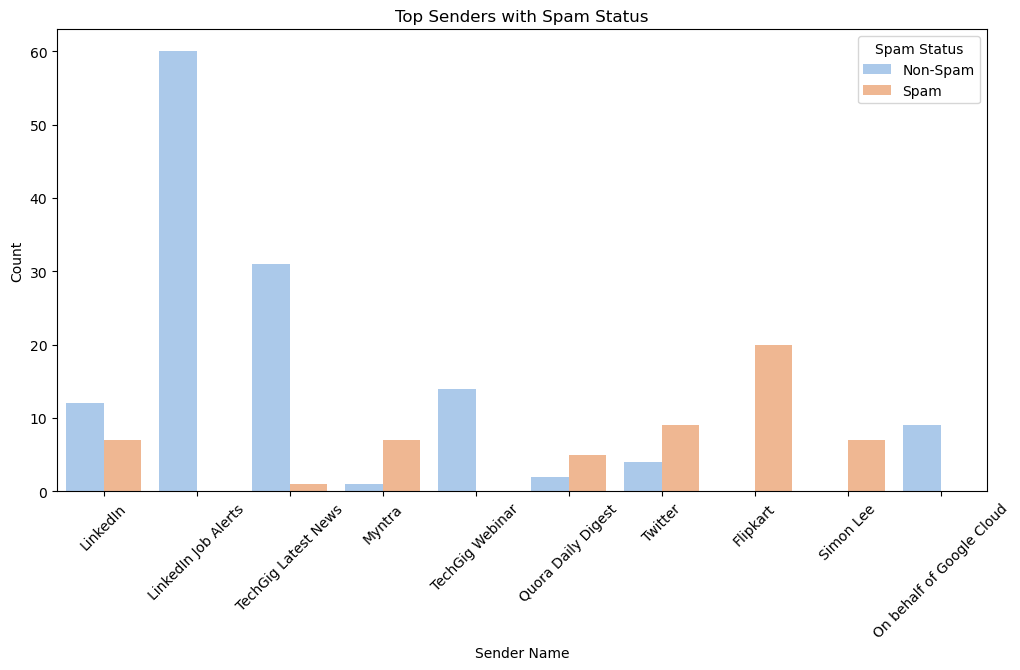

In [35]:
plt.figure(figsize=(12, 6))
top_senders = df['From (name)'].value_counts().head(10).index
filtered_df = df[df['From (name)'].isin(top_senders)]
sns.countplot(x='From (name)', hue='spam', data=filtered_df, palette='pastel')
plt.title('Top Senders with Spam Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Sender Name')
plt.legend(title='Spam Status', labels=['Non-Spam', 'Spam'])
plt.savefig("Plots\Dataset\Top_Senders_with_Spam_Status.png")
plt.show()

### 16. Count of Emails by Company and Reason:

**Description:** This function creates a count plot that counts the occurrences of each category in the specified column (company in this case) and colors them based on the reason.

In [ ]:
# Create a count plot for company and reason
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='company', hue='reason', palette='pastel')
plt.title('Count of Emails by Company and Reason')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reason', loc='upper right')
plt.show()

In [ ]:
# Get unique companies and reasons
unique_companies = df['company'].unique()

# Set the number of entries per plot
entries_per_plot = 6

# Calculate how many subplots we need
num_plots = int(np.ceil(len(unique_companies) / entries_per_plot))

# Create subplots with dynamic layout
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots), sharey=True)

# Loop through in chunks of 'entries_per_plot'
for i, ax in enumerate(axes.flat):
    # Get the chunk of companies for the current plot
    chunk_companies = unique_companies[i*entries_per_plot:(i+1)*entries_per_plot]
    
    # Filter the DataFrame for companies in the current chunk
    chunk_data = df[df['company'].isin(chunk_companies)]
    
    # Create a count plot for the chunked data
    sns.countplot(data=chunk_data, x='company', hue='reason', ax=ax, palette='pastel')
    
    # Add title and labels
    ax.set_title(f'Count of Emails by Company (Chunk {i+1})')
    ax.set_xlabel('Company')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    
    # Move the legend to the upper right corner outside the plot
    ax.legend(title='Reason', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better appearance
plt.tight_layout()
plt.show()